# **STUDY ON CART ABANDONMENT**

**INTRODUCTION**

Shopping cart abandonment refers to the phenomenon where customers add items to an online shopping cart, but then leave the site without completing the purchase. This is a common issue faced by e-commerce businesses, as it can result in a significant loss of potential revenue. Studies have shown that the average shopping cart abandonment rate is around 69%, which means that nearly 7 out of 10 customers do not complete their purchases.

**ABOUT DATASET**

Dataset taken here from kaggle consists of **4284 rows and 13 columns**.

Attributes containing in the dataset-

**ID**: The session id of the customer.

**Is_Product_Details_viewed**: Whether the customer is viewing the product details or not.

**Session_Activity_Count**: How many times a customer is going to the different pages.

**No_Items_Added_InCart**: Number of items in cart.

**No_Items_Removed_FromCart**: Number of items removed from the cart.

**No_Cart_Viewed**: How many times the customer is going to the cart page.

**No_Checkout_Confirmed**: How many times the checkout has been confirmed successfully by the customer.

**No_Checkout_Initiated**: How many times the checkout(successful as well as unsuccess) is being done by the user.

**No_Cart_Items_Viewed**: How many times a user is viewing the product from cart.

**No_Customer_Login**: Number of times the customer had did log in.

**No_Page_Viewed**: Number of pages viewed by the customer.

**Customer_Segment_Type**: The customer falls under which category,i.e, 0 for Target Customer, 1 for Loyal Customer, and 2 for Untargeted customer.

**Cart_Abandoned**: Whether the customer is doing cart abandonment or not. This is the target variable that we need to predict.

**IMPORTING LIBRARIES**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pickle

**UNDERSTANDING THE DATA**

In [22]:
dataset = pd.read_csv('data_cart_abandonment.csv')
dataset.head()

ID Is_Product_Details_viewed  Session_Activity_Count  \
0  Session_ID_0                       Yes                       4   
1  Session_ID_1                        No                      38   
2  Session_ID_2                        No                       8   
3  Session_ID_3                        No                       6   
4  Session_ID_4                       Yes                      31   

   No_Items_Added_InCart  No_Items_Removed_FromCart  No_Cart_Viewed  \
0                    1.0                          0             0.0   
1                    0.0                          0             2.0   
2                    5.0                          0             0.0   
3                    0.0                          0             2.0   
4                   14.0                         12             1.0   

   No_Checkout_Confirmed  No_Checkout_Initiated   No_Cart_Items_Viewed  \
0                      0                       0                     1   
1                      0                       0                     2   
2                      1                       1                     1   
3                      0                       0                     4   
4                      0                       0                     4   

   No_Customer_Login  No_Page_Viewed  Customer_Segment_Type  Cart_Abandoned  
0                  0               0                      0               1  
1                  0               2                      0               1  
2                  0               0                      1               0  
3                  0               0                      0               1  
4                  0               0                      2               1

In [23]:
dataset.shape

(4284, 13)

In [24]:
dataset.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [26]:
dataset.describe()

Session_Activity_Count  No_Items_Added_InCart  \
count             4284.000000            4275.000000   
mean                13.878151               3.488421   
std                 15.934084               6.789401   
min                  0.000000               0.000000   
25%                  6.000000               1.000000   
50%                 10.000000               2.000000   
75%                 17.000000               5.000000   
max                436.000000             225.000000   

       No_Items_Removed_FromCart  No_Cart_Viewed  No_Checkout_Confirmed  \
count                4284.000000     4275.000000            4284.000000   
mean                    0.867180        1.444211               0.187208   
std                     3.070022        2.082496               0.517691   
min                     0.000000        0.000000               0.000000   
25%                     0.000000        0.000000               0.000000   
50%                     0.000000        1.000000               0.000000   
75%                     0.000000        2.000000               0.000000   
max                    50.000000       34.000000              11.000000   

       No_Checkout_Initiated   No_Cart_Items_Viewed  No_Customer_Login  \
count             4284.000000           4284.000000        4284.000000   
mean                 0.980159              2.295985           0.169234   
std                  1.140525              6.052666           0.400299   
min                  0.000000              0.000000           0.000000   
25%                  0.000000              1.000000           0.000000   
50%                  1.000000              1.000000           0.000000   
75%                  1.000000              2.000000           0.000000   
max                 14.000000            256.000000           3.000000   

       No_Page_Viewed  Customer_Segment_Type  Cart_Abandoned  
count     4284.000000            4284.000000     4284.000000  
mean         2.348506               0.563259        0.856209  
std          2.868862               0.703856        0.350918  
min          0.000000               0.000000        0.000000  
25%          1.000000               0.000000        1.000000  
50%          2.000000               0.000000        1.000000  
75%          3.000000               1.000000        1.000000  
max         35.000000               2.000000        1.000000

In [27]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [28]:
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)

In [29]:
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

**COUNT PLOT OF NUMBER OF ABANDONED CARTS**

<Axes: ylabel='count'>

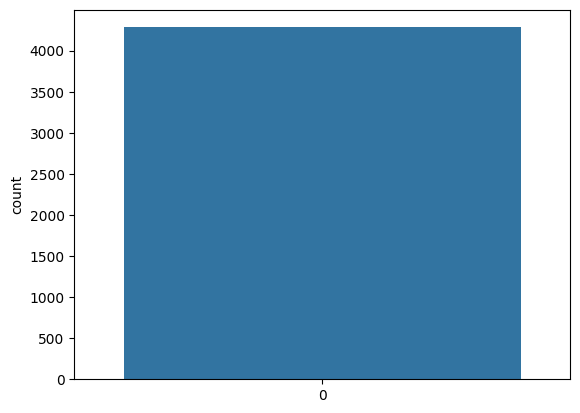

In [30]:
sns.countplot(dataset.Cart_Abandoned)

**EXPLORATORY DATA ANALYSIS**

In [31]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [32]:
num.shape

(4284, 9)

1.FOR NUMERICAL VARIABLES

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

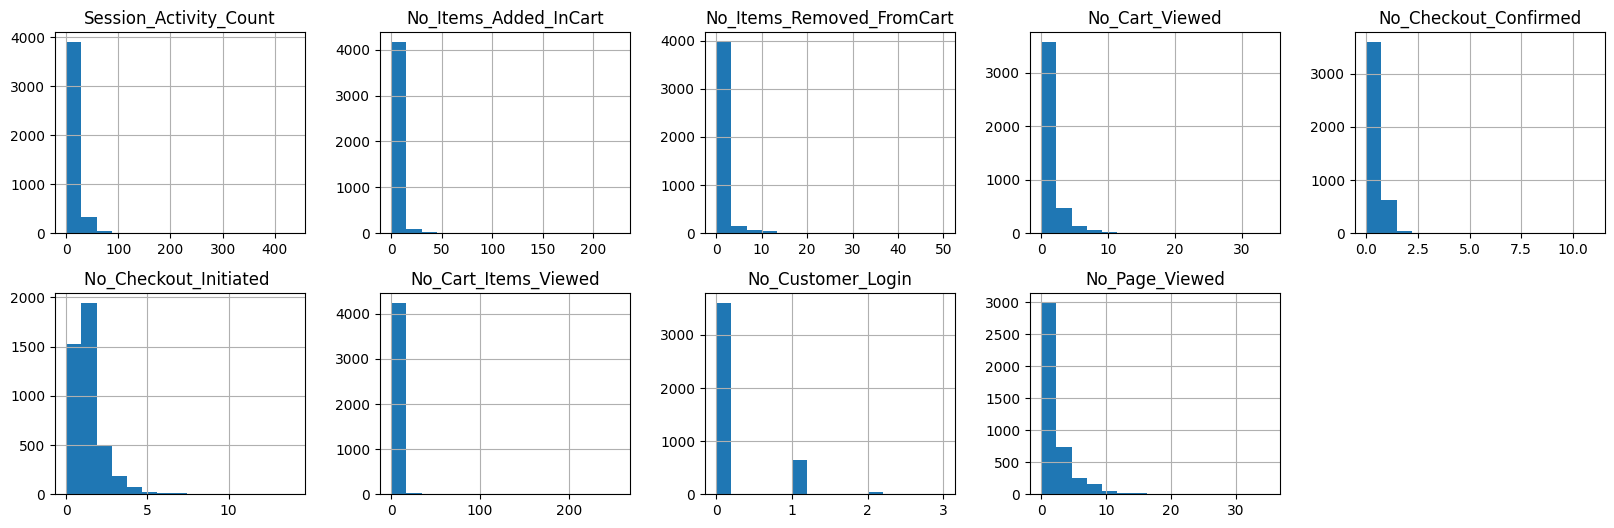

In [33]:
num.hist(bins=15, figsize=(20, 6), layout=(2, 5))

2.FOR CATEGORICAL VARIABLES

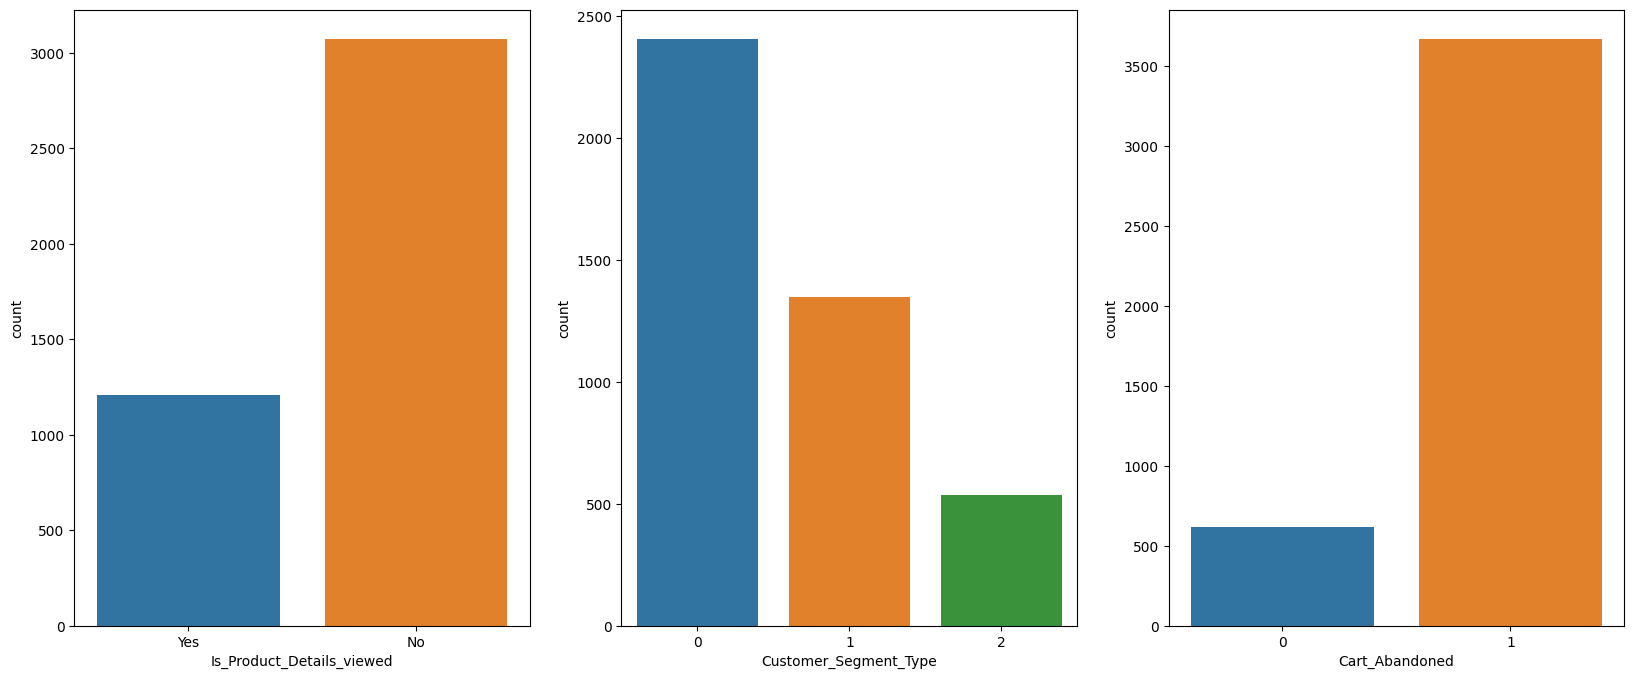

In [34]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

**CORELATION PLOT OF INDEPENDENT ATTRIBUTES**

<Axes: >

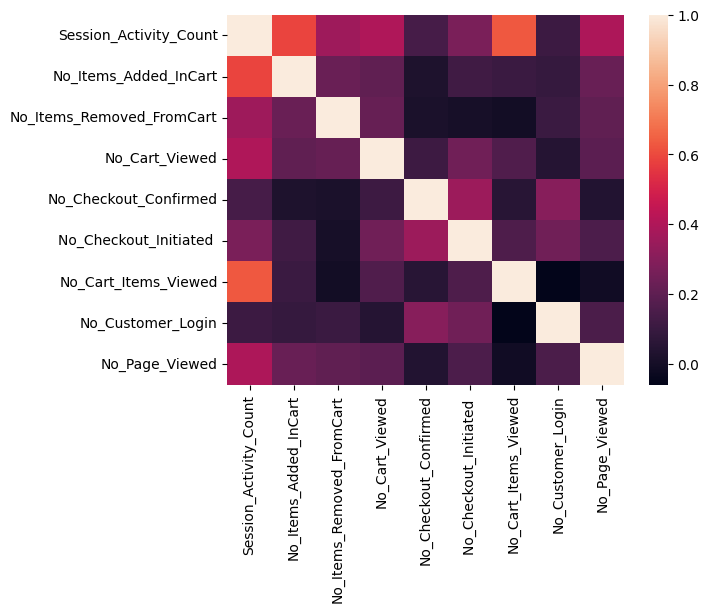

In [35]:
corr = num.corr()
sns.heatmap(corr)

**DATA PREPARATION**

* FINDING NA VALUES FROM DATASET

In [36]:
data = dataset.copy()
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [37]:
#COLUMNS WHICH HAVE NA VALUES
null_col = data.columns[data.isna().any()].tolist()
null_col

['No_Items_Added_InCart', 'No_Cart_Viewed']

* REPLACING NA VALUES WITH RESPECTIVE COLUMN MEAN

In [38]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].mean())
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].mean())

In [39]:
data[null_col] = data[null_col].astype("int64")

In [40]:
#CHECKING IF STILL ANY NA VALUES PRESENT
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

1. TAKING CARE OF OUTLIERS USING MIN-MAX NORMALISATION

In [41]:
num=data.select_dtypes(include=["int64"])
cat=data.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [42]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [43]:
# pickle_out = open("scalar.pkl", "wb")
# pickle.dump(min_max_scaler, pickle_out)
# pickle_out.close()

In [44]:
#NORMALISED DATA
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head()

Session_Activity_Count  No_Items_Added_InCart  No_Items_Removed_FromCart  \
0                0.009174               0.004444                       0.00   
1                0.087156               0.000000                       0.00   
2                0.018349               0.022222                       0.00   
3                0.013761               0.000000                       0.00   
4                0.071101               0.062222                       0.24   

   No_Cart_Viewed  No_Checkout_Confirmed  No_Checkout_Initiated   \
0        0.000000               0.000000                0.000000   
1        0.058824               0.000000                0.000000   
2        0.000000               0.090909                0.071429   
3        0.058824               0.000000                0.000000   
4        0.029412               0.000000                0.000000   

   No_Cart_Items_Viewed  No_Customer_Login  No_Page_Viewed  
0              0.003906                0.0        0.000000  
1              0.007812                0.0        0.057143  
2              0.003906                0.0        0.000000  
3              0.015625                0.0        0.000000  
4              0.015625                0.0        0.000000

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

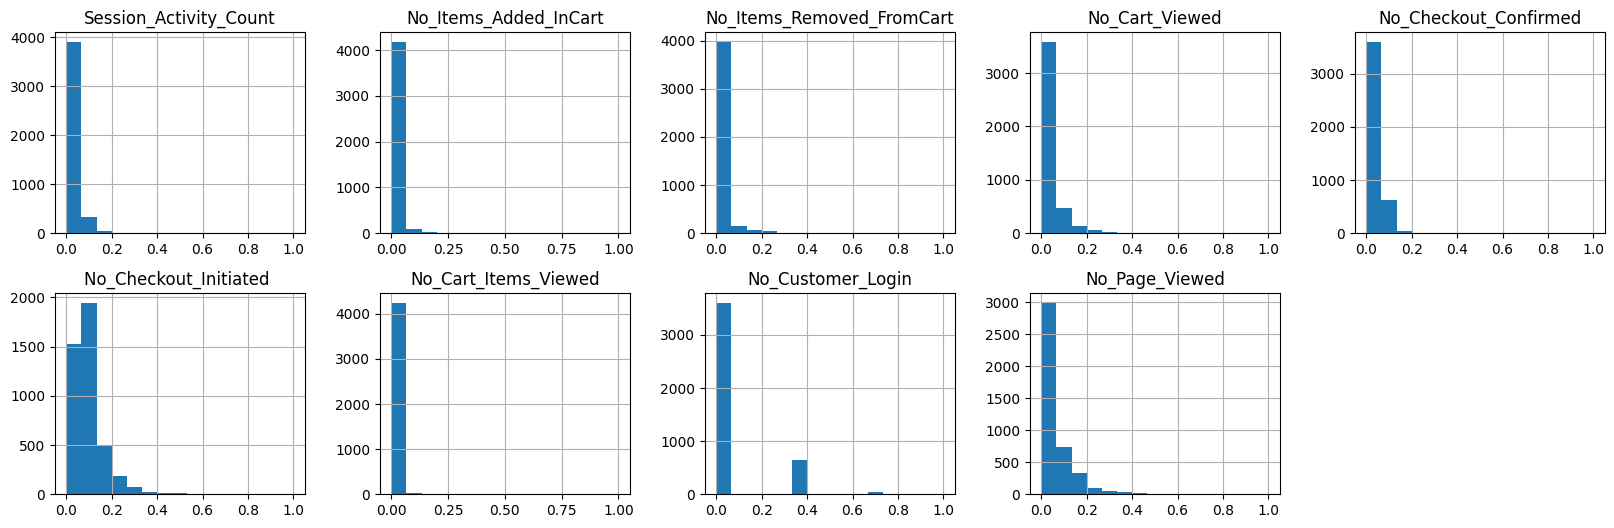

In [45]:
#DATA VISUALIZATION FOR NORMALISED DATA
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5))

In [46]:
df_scaled["ID"]=data.ID
df_scaled.set_index('ID',inplace=True)

In [47]:
df_scaled.reset_index(inplace=True)

In [48]:
df_final=df_scaled.join(cat)
df_final.head(3)

ID  Session_Activity_Count  No_Items_Added_InCart  \
0  Session_ID_0                0.009174               0.004444   
1  Session_ID_1                0.087156               0.000000   
2  Session_ID_2                0.018349               0.022222   

   No_Items_Removed_FromCart  No_Cart_Viewed  No_Checkout_Confirmed  \
0                        0.0        0.000000               0.000000   
1                        0.0        0.058824               0.000000   
2                        0.0        0.000000               0.090909   

   No_Checkout_Initiated   No_Cart_Items_Viewed  No_Customer_Login  \
0                0.000000              0.003906                0.0   
1                0.000000              0.007812                0.0   
2                0.071429              0.003906                0.0   

   No_Page_Viewed Is_Product_Details_viewed Customer_Segment_Type  \
0        0.000000                       Yes                     0   
1        0.057143                        No                     0   
2        0.000000                        No                     1   

  Cart_Abandoned  
0              1  
1              1  
2              0

In [49]:
df_final.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
df_final.head(3)

ID  Session_Activity_Count  No_Items_Added_InCart  \
0  Session_ID_0                0.009174               0.004444   
1  Session_ID_1                0.087156               0.000000   
2  Session_ID_2                0.018349               0.022222   

   No_Items_Removed_FromCart  No_Cart_Viewed  No_Checkout_Confirmed  \
0                        0.0        0.000000               0.000000   
1                        0.0        0.058824               0.000000   
2                        0.0        0.000000               0.090909   

   No_Checkout_Initiated   No_Cart_Items_Viewed  No_Customer_Login  \
0                0.000000              0.003906                0.0   
1                0.000000              0.007812                0.0   
2                0.071429              0.003906                0.0   

   No_Page_Viewed  Is_Product_Details_viewed Customer_Segment_Type  \
0        0.000000                          1                     0   
1        0.057143                          0                     0   
2        0.000000                          0                     1   

  Cart_Abandoned  
0              1  
1              1  
2              0

In [50]:
df_final.dtypes

ID                             object
Session_Activity_Count        float64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart     float64
No_Cart_Viewed                float64
No_Checkout_Confirmed         float64
No_Checkout_Initiated         float64
No_Cart_Items_Viewed          float64
No_Customer_Login             float64
No_Page_Viewed                float64
Is_Product_Details_viewed       int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

In [51]:
df_final.Is_Product_Details_viewed=pd.Categorical(df_final.Is_Product_Details_viewed)

* FEATURE SELECTION

**USING RECURSIVE FEATURE ELIMINATION**

In [52]:
X=df_final.iloc[:,1:12]
X.shape

(4284, 11)

In [53]:
y=df_final["Cart_Abandoned"]
y.name

'Cart_Abandoned'

In [54]:
lr = LogisticRegression()
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=7, verbose = 3 )
fit=rfe.fit(X,y)
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Num Features: 7
Selected Features: [ True  True False False  True  True False  True  True  True False]
Feature Ranking: [1 1 4 2 1 1 5 1 1 1 3]


In [55]:
l = [i for i,x in enumerate(list(fit.support_)) if x == True]

In [56]:
X.columns

Index(['Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type'],
      dtype='object')

In [57]:
feature_selected = [X[X.columns[l[i]]].name for i,x in enumerate(l)]

In [58]:
#SELECTED FEATURES
feature_selected

['Session_Activity_Count',
 'No_Items_Added_InCart',
 'No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Is_Product_Details_viewed']

**2.By Random Forest Classifier**

In [59]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})

In [60]:
feature_weightage_dict

{'Session_Activity_Count': 0.05052857005529642,
 'No_Items_Added_InCart': 0.025547984898027527,
 'No_Items_Removed_FromCart': 0.010172300692196705,
 'No_Cart_Viewed': 0.017810335296951977,
 'No_Checkout_Confirmed': 0.7341868777064404,
 'No_Checkout_Initiated ': 0.0441808380652188,
 'No_Cart_Items_Viewed': 0.018703955749515146,
 'No_Customer_Login': 0.05604221107820115,
 'No_Page_Viewed': 0.027120211503535017,
 'Is_Product_Details_viewed': 0.009764913736069736,
 'Customer_Segment_Type': 0.0059418012185472185}

In [61]:
sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)

In [62]:
#FEATURES WEIGHTAGE IN DECREASING ORDER
sorted_feature_weightage_dict

[('No_Checkout_Confirmed', 0.7341868777064404),
 ('No_Customer_Login', 0.05604221107820115),
 ('Session_Activity_Count', 0.05052857005529642),
 ('No_Checkout_Initiated ', 0.0441808380652188),
 ('No_Page_Viewed', 0.027120211503535017),
 ('No_Items_Added_InCart', 0.025547984898027527),
 ('No_Cart_Items_Viewed', 0.018703955749515146),
 ('No_Cart_Viewed', 0.017810335296951977),
 ('No_Items_Removed_FromCart', 0.010172300692196705),
 ('Is_Product_Details_viewed', 0.009764913736069736),
 ('Customer_Segment_Type', 0.0059418012185472185)]

In [63]:
df_final.columns

Index(['ID', 'Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type',
       'Cart_Abandoned'],
      dtype='object')

### From above two feature selection methods we can say No_Items_Added_InCart, No_Checkout_Confirmed, No_Checkout_Initiated, No_Customer_Login and No_Page_Viewed has higher importance features.So we consider that attributes only to train our model

**TRAIN VALIDATION SPLIT**

In [64]:
X = df_final.iloc[:,[5,6,8,9,2]]
y = df_final.loc[:,["Cart_Abandoned"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

[link text](https://)**OVERSAMPLING USING SMOTE**

In [66]:
sm = SMOTE(random_state=2, k_neighbors=5)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

**TRAIN-TEST SPLIT AFTER SMOTE**

In [67]:
# Splitting the resampled training data into new training and validation sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_resampled, y_train_resampled, test_size=0.40, random_state=0)


## **MODEL BUILDING AND PREDICTION**

In [68]:
# Train a logistic regression classifier
lr1 = LogisticRegression()
lr1.fit(X_train_new, y_train_new)
y_pred_new = lr1.predict(X_test_new)  #For SMOTE validation samples
y_pred=lr1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **EVALUATION USING PERMORMANCE MEASURES**

**Evaluation of train-test split before SMOTE**

In [69]:
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(" Kappa is %f" %cohen_kappa_score(y_test, y_pred))

 accuracy is 0.970
 Kappa is 0.887914


**Evaluation of train-test split after SMOTE**

In [70]:
print(" accuracy is %2.3f" % accuracy_score(y_test_new, y_pred_new))
print(" Kappa is %f" %cohen_kappa_score(y_test_new, y_pred_new))

 accuracy is 0.975
 Kappa is 0.949967


In [71]:
pickle_out = open("lr1.pkl", "wb")
pickle.dump(lr1, pickle_out)
pickle_out.close()

In [72]:
# Take input from the user for relevant features
user_input = {
    "No_Items_Added_InCart": int(input("Enter the number of items added to the cart: ")),
    "No_Checkout_Confirmed": int(input("Enter the number of checkouts confirmed: ")),
    "No_Checkout_Initiated": int(input("Enter the number of checkout initiated (successful and unsuccessful): ")),
    "No_Customer_Login": int(input("Enter the number of customer logins: ")),
    "No_Page_Viewed": int(input("Enter the number of pages viewed by the customer: "))
}

# Create a DataFrame with the user input
user_input_df = pd.DataFrame([user_input])

# Extract relevant features for scaling
user_input_features = user_input_df[["No_Items_Added_InCart", "No_Checkout_Confirmed", "No_Checkout_Initiated", "No_Customer_Login", "No_Page_Viewed"]]

# Create a new MinMaxScaler for the user input and fit it on the relevant features
user_input_scaler = MinMaxScaler()
user_input_scaled = user_input_scaler.fit_transform(user_input_features)

# Use the model to predict cart abandonment
predicted_abandonment = lr1.predict(user_input_scaled)

# Convert the prediction to human-readable format
prediction_label = "Abandoned" if predicted_abandonment[0] == 1 else "Not Abandoned"

# Display the prediction
print("Prediction: The customer is likely to", prediction_label, "the cart.")


Enter the number of items added to the cart: 4
Enter the number of checkouts confirmed: 5
Enter the number of checkout initiated (successful and unsuccessful): 2
Enter the number of customer logins: 2
Enter the number of pages viewed by the customer: 4
Prediction: The customer is likely to Abandoned the cart.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## **CONCLUSION**

### By using this analysis we can predict whether a customer will do abandonment or not in the future. So that we can able to give them some offers so that they able to complete the checkout successfully.